# MNIST autoencoder

In [1]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

2023-01-16 00:06:56.254291: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-16 00:06:56.885946: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda-11.7/lib64
2023-01-16 00:06:56.885988: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda-11.7/lib64
2023-01-16 00:06:56.885993: W tensorflow/compiler/tf2tensorrt/utils/py_utils

TensorFlow version: 2.11.0


In [2]:
from keras.layers import Dense, Input
from keras.models import Model
import numpy as np
import matplotlib.pyplot as plt


## Utility Function

In [3]:
def plot_autoencoder_outputs(autoencoder, n, dims):
    decoded_imgs = autoencoder.predict(x_test)

    # number of example digits to show
    n = 5
    plt.figure(figsize=(10, 4.5))
    for i in range(n):
        # plot original image
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(x_test[i])
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        if i == n/2:
            ax.set_title('Original Images')

        # plot reconstruction 
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(decoded_imgs[i])
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        if i == n/2:
            ax.set_title('Reconstructed Images')
    plt.show()

## Data Loading

In [4]:
mnist = tf.keras.datasets.mnist
path='./mnist.npz'
(x_train, y_train), (x_test, y_test) = mnist.load_data(path)
x_train, x_test = x_train / 255.0, x_test / 255.0

print(x_train.shape)
print(x_test.shape)


(60000, 28, 28)
(10000, 28, 28)


## Build network

In [41]:
input_size = 784
hidden_size = 128
code_size = 32

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(hidden_size, activation='relu'),
  tf.keras.layers.Dense(code_size, activation='relu'),
  tf.keras.layers.Dense(hidden_size, activation='relu'),
  tf.keras.layers.Dense(input_size, activation='sigmoid'),
  tf.keras.layers.Reshape((28,28))

])


## Training

In [44]:
model.compile(optimizer='SGD',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, x_train, epochs=5)

Epoch 1/3
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0860 - accuracy: 0.2981
Epoch 2/3
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0860 - accuracy: 0.2982
Epoch 3/3
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0860 - accuracy: 0.2983


## Visualize results

313/313 [==============================] - 0s 668us/step


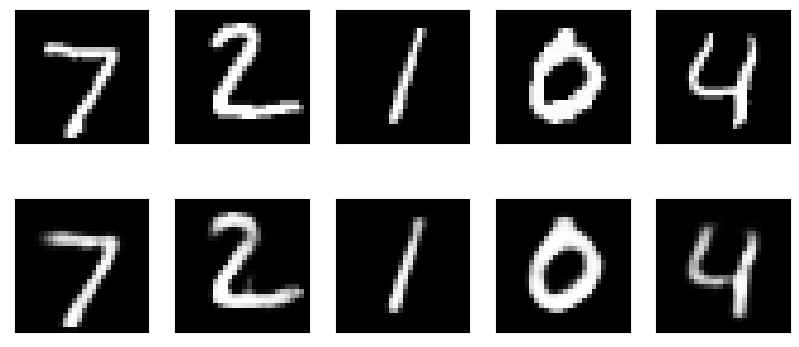

In [45]:
plot_autoencoder_outputs(model, 5, (28, 28))

# Denoising Autoencoder

## Create noisy images from MNIST


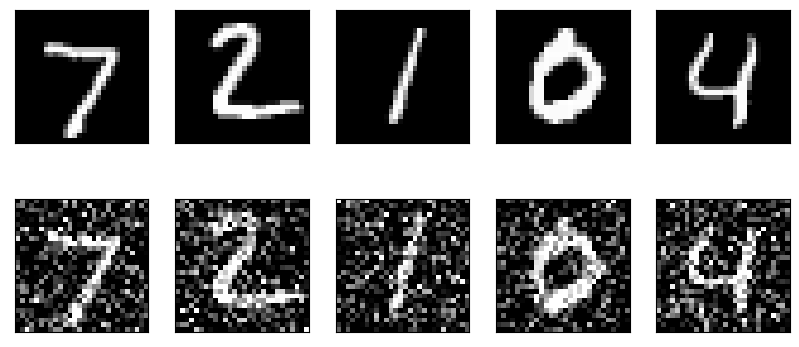

In [46]:
noise_factor = 0.4
x_train_noisy = x_train + noise_factor * np.random.normal(size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(size=x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0.0, 1.0)
x_test_noisy = np.clip(x_test_noisy, 0.0, 1.0)

n = 5
plt.figure(figsize=(10, 4.5))
for i in range(n):
    # plot original image
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == n/2:
        ax.set_title('Original Images')

    # plot noisy image 
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(x_test_noisy[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == n/2:
        ax.set_title('Noisy Input')


## Build network

In [57]:
input_size = 784
hidden_size = 128
code_size = 32

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(hidden_size, activation='relu'),
  tf.keras.layers.Dense(code_size, activation='relu'),
  tf.keras.layers.Dense(hidden_size, activation='relu'),
  tf.keras.layers.Dense(input_size, activation='sigmoid'),
  tf.keras.layers.Reshape((28,28))

])


## Training

In [62]:
model.compile(optimizer='SGD',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(x_train_noisy, x_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1027 - accuracy: 0.2711
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1023 - accuracy: 0.2722
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1021 - accuracy: 0.2725
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1020 - accuracy: 0.2728
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1019 - accuracy: 0.2729
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1019 - accuracy: 0.2731
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1018 - accuracy: 0.2732
Epoch 8/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1018 - accuracy: 0.2734
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1018 - accuracy: 0.2734
Epoch 10/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.101

## Visualize results

313/313 [==============================] - 0s 657us/step


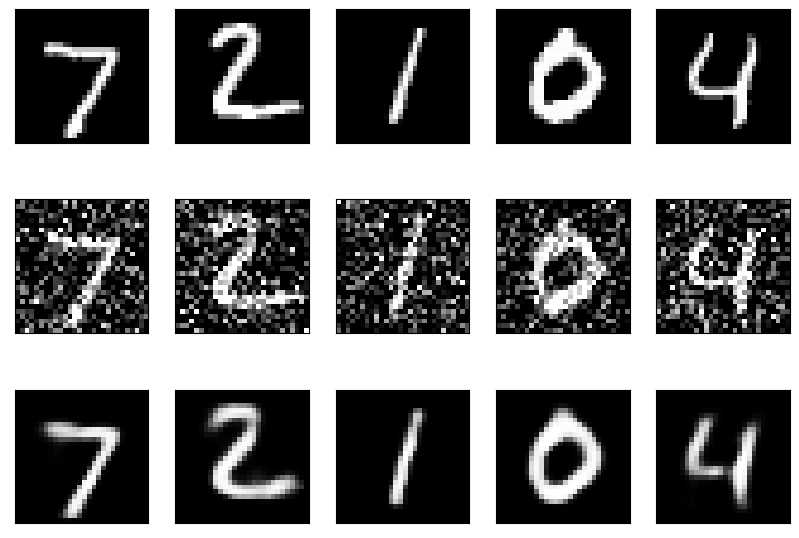

In [63]:
n = 5
plt.figure(figsize=(10, 7))

images = model.predict(x_test_noisy)

for i in range(n):
    # plot original image
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == n/2:
        ax.set_title('Original Images')

    # plot noisy image 
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_test_noisy[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == n/2:
        ax.set_title('Noisy Input')
        
    # plot denoised image 
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(images[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == n/2:
        ax.set_title('Autoencoder Output')
